# Assignment on Decision Trees for Heart Failure data

The variables of this dataset are as follows

- `age`: age of the patient (years)
- `anaemia`: decrease of red blood cells or - hemoglobin (boolean)
- `cpk`: level of the CPK enzyme in the blood (mcg/L)
- `diabetes`: if the patient has diabetes (boolean)
- `ef`: ejection fraction: percentage of blood leaving the heart at each contraction
- `hbp`: if the - patient has hypertension (boolean)
- `platelets`: platelets in the blood (kiloplatelets/mL)
- `sc`: level of serum creatinine in the blood (mg/dL)
- `ss`: level of serum sodium in the blood (mEq/L)
- `sex`: female/male (binary)
- `smoking`: if the patient smokes or not (boolean)
- `fup`: follow-up period (days) -> WE REMOVE IT
- `death_event`: the patient deceased during the follow-up period (boolean)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import sklearn
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import RMSprop, Adam
from scipy.interpolate import interp1d
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



import io
import tensorflow as tf
import keras
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.callbacks import EarlyStopping
from datetime import datetime
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error 
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop
from keras import initializers
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
import missingno as msno
import random




In [37]:
data = pd.read_csv("HFCRD.csv")
data.shape

(299, 13)

In [38]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [39]:
df = data.drop('time', axis=1)
print(df.shape)
df.head()

(299, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


### 1. Exploratory Data Analysis

Notice we have 12 variables on 299 entries and there are no missing values.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [41]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [42]:
X = df.iloc[:,:-1]
y = df['DEATH_EVENT']

## 2. Train-Test Partition

In [43]:
np.random.seed(1234)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(np.array(X), np.array(y), test_size = 1/3, random_state = 8)
print(X_train.shape); print(X_test.shape); 
print((X_test.shape[0]/(X_test.shape[0] + X_train.shape[0])))
print((y_test.shape[0]/(y_test.shape[0] + y_train.shape[0])))

(199, 11)
(100, 11)
0.33444816053511706
0.33444816053511706


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Fitting Statistical Models

We will now be fitting the available data using three different statistical models
- A *decision tree* to predcit survival (encoded in `death_event`)
- A *logistic* classifier to predict survival
- (To be decided by us)

In [45]:
from sklearn import tree

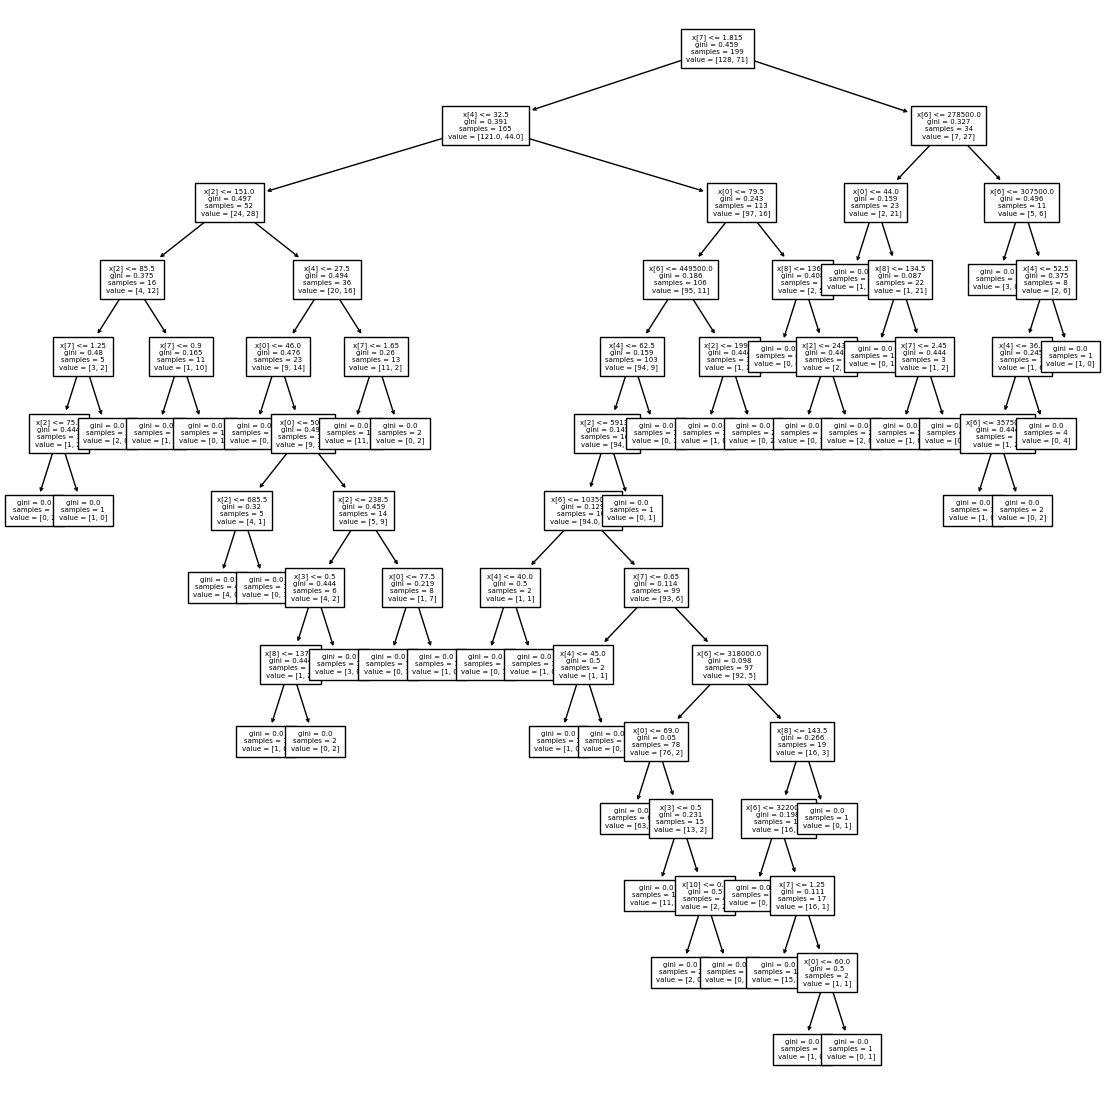

In [46]:
# Naive classification tree
clf_0 = tree.DecisionTreeClassifier()
clf_0 = clf_0.fit(X_train, y_train)

plt.figure(figsize=(14,14)) 
tree.plot_tree(clf_0, fontsize = 5)
plt.show()

In [47]:
from sklearn.metrics import accuracy_score
y_test_pred = clf_0.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.66

In [48]:
aux = 0
for criterion in ['gini', 'entropy']:
    for splitter in ['best', 'random']:
        for max_depth in [1, 2, 3, 4, 5, 6]:
            # print(criterion, splitter, max_depth)
            clf = tree.DecisionTreeClassifier(criterion = criterion, splitter = splitter, max_depth = max_depth, random_state = 321)
            clf = clf.fit(X_train, y_train)
            y_train_pred = clf.predict(X_train)
            y_test_pred = clf.predict(X_test)
            train_acc = accuracy_score(y_train, y_train_pred);  #print(train_acc)
            test_acc = accuracy_score(y_test, y_test_pred);  #print(test_acc)
            if test_acc > aux:
                aux = test_acc
                combination = [criterion, splitter, max_depth]

print(aux)
print(combination)
            
            

0.77
['gini', 'best', 1]


In [49]:
X.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
      dtype='object')

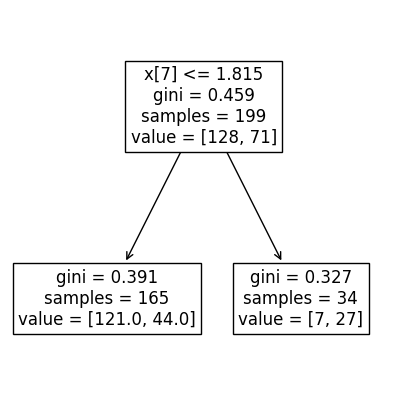

0.7437185929648241
0.77


In [50]:
clf = tree.DecisionTreeClassifier(criterion = combination[0], splitter = combination[1], max_depth = combination[2], random_state = 321)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(5,5)) 
tree.plot_tree(clf, fontsize = 12)
plt.show()
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred); print(train_acc)
test_acc = accuracy_score(y_test, y_test_pred); print(test_acc)     

# x[7] is serum_creatinine

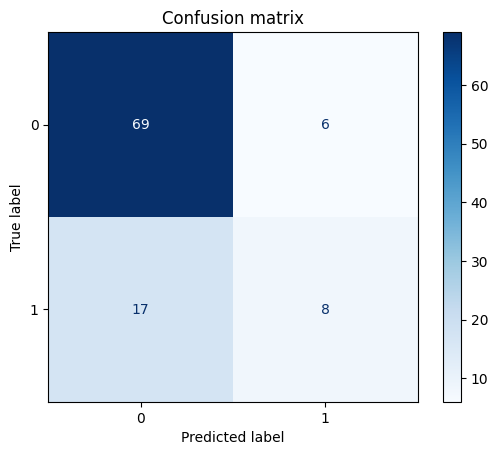


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        75
           1       0.57      0.32      0.41        25

    accuracy                           0.77       100
   macro avg       0.69      0.62      0.63       100
weighted avg       0.74      0.77      0.75       100



In [51]:
confusion_mtx = confusion_matrix(y_test, y_test_pred) 

disp = ConfusionMatrixDisplay(confusion_matrix= confusion_mtx, display_labels= None)
disp.plot(cmap= plt.cm.Blues)
plt.title("Confusion matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


In [52]:
from sklearn.linear_model import LogisticRegression

In [18]:
# X_train_scaled

In [53]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train_scaled, y_train)
y_pred_lg = lg_model.predict(X_test_scaled)

In [54]:
print(X_train_scaled.shape); print(y_train.shape); 
print(X_test_scaled.shape); print(y_test.shape); 
print(y_pred_lg.shape)

(199, 11)
(199,)
(100, 11)
(100,)
(100,)


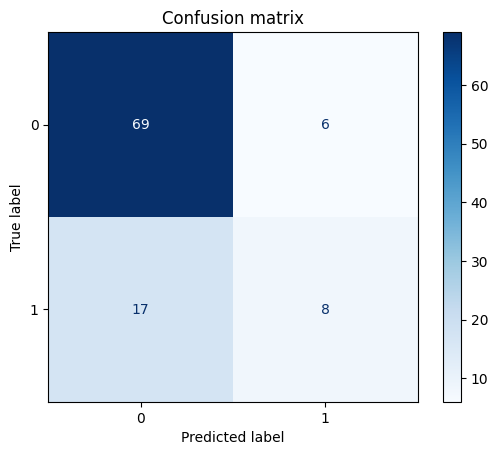


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        75
           1       0.57      0.32      0.41        25

    accuracy                           0.77       100
   macro avg       0.69      0.62      0.63       100
weighted avg       0.74      0.77      0.75       100



In [55]:
confusion_mtx = confusion_matrix(y_test, y_pred_lg) 

disp = ConfusionMatrixDisplay(confusion_matrix= confusion_mtx, display_labels= None)
disp.plot(cmap= plt.cm.Blues)
plt.title("Confusion matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_lg))

## Support Vector Machine

In [56]:
from sklearn.svm import SVC

In [57]:
svm_model = SVC()
svm_model = svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

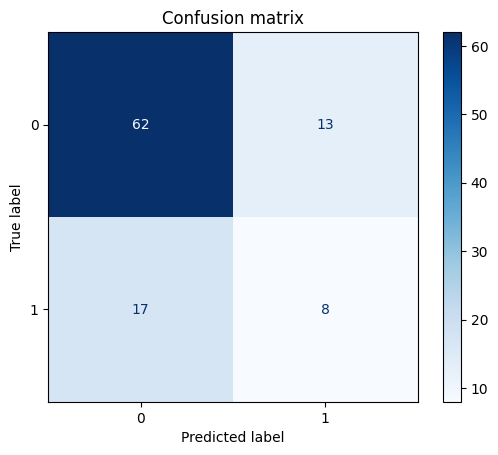


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81        75
           1       0.38      0.32      0.35        25

    accuracy                           0.70       100
   macro avg       0.58      0.57      0.58       100
weighted avg       0.68      0.70      0.69       100



In [58]:
confusion_mtx = confusion_matrix(y_test, y_pred_svm) 

disp = ConfusionMatrixDisplay(confusion_matrix= confusion_mtx, display_labels= None)
disp.plot(cmap= plt.cm.Blues)
plt.title("Confusion matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

## Neural network

In [59]:
input_layer = Input(shape=(X_train_scaled.shape[1],)) 

In [27]:
# Grid search 
aux = 0;
for neurons in [5, 10, 16, 32, 64]:
    for dropout_rate in [0, 0.1, 0.2, 0.3]:
        for batch_size in [16, 32]:
                    
            combination = [neurons, dropout_rate, batch_size]
            print(combination)
            keras.utils.set_random_seed(1)
                    
            model = Sequential()
            model.add(Dense(neurons, input_shape=(X_train_scaled.shape[1],), activation='relu'))
            model.add(Dropout(rate=dropout_rate))
            model.add(Dense(2,activation='softmax')) 
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics = 'accuracy')
                    
            history = model.fit(X_train_scaled, pd.get_dummies(y_train).values,
            batch_size=batch_size,
            epochs=200,
            validation_split=0.3, 
            verbose=0) 
                   
            score = model.evaluate(X_test_scaled,pd.get_dummies(y_test).values)
            if score[1] > aux:
                aux = score[1]
                
print(combination)
print(aux)

[5, 0, 16]
4/4 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.7900
[5, 0, 32]
4/4 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7700
[5, 0.1, 16]
4/4 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.7800
[5, 0.1, 32]
4/4 [==============================] - 0s 1ms/step - loss: 0.5994 - accuracy: 0.7700
[5, 0.2, 16]
4/4 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.7600
[5, 0.2, 32]
4/4 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.7500
[5, 0.3, 16]
4/4 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.7500
[5, 0.3, 32]
4/4 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.7500
[10, 0, 16]
4/4 [==============================] - 0s 2ms/step - loss: 0.8464 - accuracy: 0.7300
[10, 0, 32]
4/4 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.7600
[10, 0.1, 16]
4/4 [=======

Best combination is 'neurons' = 5, 'dropout_rate' = 0, 'batch_size' = 16.

In [28]:
keras.utils.set_random_seed(1)
                    
model = Sequential()
model.add(Dense(5, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dropout(rate=0))
model.add(Dense(2,activation='softmax')) 
                
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = 'accuracy')
                    

history = model.fit(X_train_scaled, pd.get_dummies(y_train).values,
    batch_size=16,
    epochs=200,
    validation_split=0.3, 
    verbose=0)                 

score = model.evaluate(X_test_scaled,pd.get_dummies(y_test).values)

if score[1] > aux:
    aux = score[1]
    print(combination)
    print(aux)

4/4 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.7900


Text(0, 0.5, 'Accuracy')

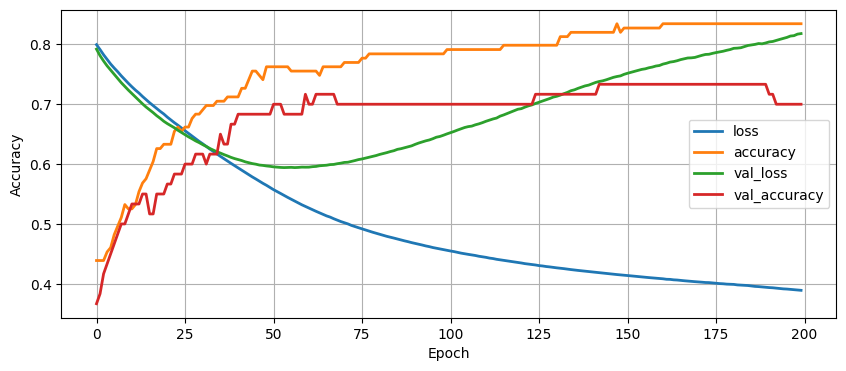

In [29]:
pd.DataFrame(history.history).plot(figsize=(10, 4), linewidth=2)
plt.grid(); plt.xlabel('Epoch'); plt.ylabel('Accuracy')

4/4 [==============================] - 0s 1ms/step


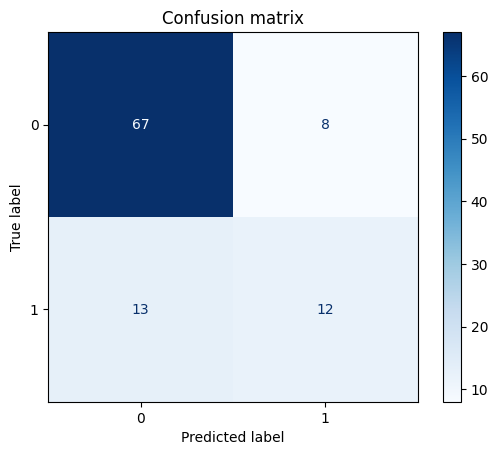


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        75
           1       0.60      0.48      0.53        25

    accuracy                           0.79       100
   macro avg       0.72      0.69      0.70       100
weighted avg       0.78      0.79      0.78       100



In [31]:
yhat = model.predict(X_test_scaled); 

y_pred_labels = np.argmax(yhat, axis=1)

confusion_mtx = confusion_matrix(y_test, y_pred_labels) 

disp = ConfusionMatrixDisplay(confusion_matrix= confusion_mtx, display_labels= None)
disp.plot(cmap= plt.cm.Blues)
plt.title("Confusion matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))